In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Datasets/
import pandas as pd
df = pd.read_csv('processed.cleveland.data')

/content/drive/MyDrive/Datasets


In [3]:
#1: Age in Years
#2: Sex (0 = F, 1 = M) 
#3: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) 
#4: Resting blood pressure at admission (mmHg),
#5: Serum cholesterol (mmHg) 
#6: Fasting blood sugar > 120 mg/DL 1 = T, 0 = F
#7: Resting electrocardiographic results: 0 = normal, 1 = ST-T wave abnormality, 2 = probable/definite left ventricular hypertrophy
#8: Maximum heart rate achieved
#9: Exercise induced angina (1 = yes, 0 = no)
#10: ST depression induced by exercise relative to rest
#11: Slope of peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
#12: Number of major vessels (0-3) colored by fluoroscopy 
#13: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
#14: Diagnosis of Heart Disease (Angiographic Disease- 0: <50% diameter narrowing, 1: > 50% diameter narrowing)
df.columns = ['Age (Years)', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure (mmHg)', 'Serum Cholesterol (mmHg)', 'Fasting Blood Sugar > 120 mg/dL', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved', 'Exercise-Induced Angina', 'ST Depression Induced by Exercise Relative to Rest', 'Slope of the Peak Exercise ST Segment','Number of Major Vessels Colored by Fluoroscopy', 'Thalassemia', 'Diagnosis of Heart Disease']


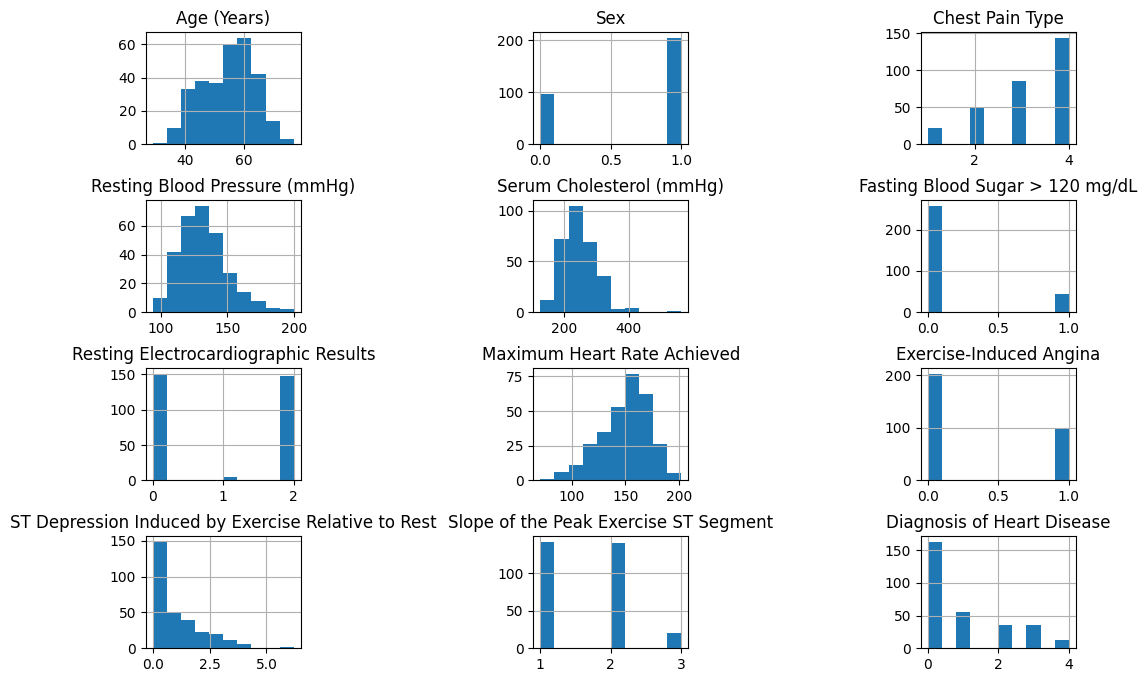

In [4]:
#Generate a histogram plot for each of the following values in the processed.cleveland.data dataset
import pandas as pd
import matplotlib.pyplot as plt

res = df.hist(figsize=[12,8])
plt.subplots_adjust(hspace=0.5, wspace=1.5)
plt.show()

With missing values:  (303, 14)
Without missing values:  (297, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (297) is greater than the total number of samples (237). n_quantiles is set to n_samples.
  warnings.warn(


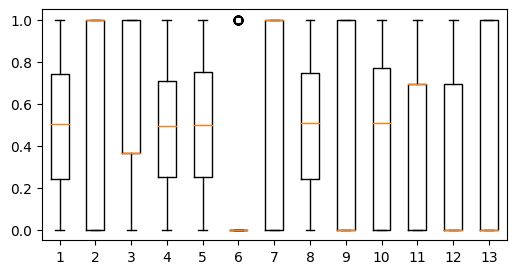

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

# Load the dataset
df = pd.read_csv('processed.cleveland.data', header=None)
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
              'MaxHR', 'ExerciseAngina', 'Oldpeak', 'STslope', 'MajorVessels', 'Thal', 'Target']

# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)

# Convert data to float
df = df.astype(float)

# Drop rows with NaN values
print("With missing values: ", df.shape)
df.dropna(inplace=True)
print("Without missing values: ", df.shape)

# Select the features and target
X = df.iloc[:, :13].values
y = df.iloc[:, 13].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = QuantileTransformer(n_quantiles=df.shape[0], output_distribution="uniform", random_state=1111)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#The code generates a boxplot of the training set after normalizing the data using the QuantileTransformer function from Scikit-learn. 
#The boxplot displays the distribution of each feature in the training set and helps identify any outliers or skewness in the data.
fig = plt.figure(figsize =(6, 3))
plt.boxplot(X_train)
plt.show()